# **Yulu Business Case Study**

**About Yulu**

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**The company wants to know:**

**Q**. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

**Q**. How well those variables describe the electric cycle demands

**Column Profiling:**

**datetime**: datetime

**season**: season (1: spring, 2: summer, 3: fall, 4: winter)
holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

**workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.

**weather**:

1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**temp**: temperature in Celsius

**atemp**: feeling temperature in Celsius

**humidity**: humidity

**windspeed**: wind speed

**casual**: count of casual users

**registered**: count of registered users

**count**: count of total rental bikes including both casual and registered

In [1]:
from google.colab import files
uploaded=files.upload()

Saving bike_sharing.csv to bike_sharing.csv


In [22]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings('ignore')

# converting data into dataframe
yulu= pd.read_csv('bike_sharing.csv')

# making an copy of the dataset
yl = yulu.copy()

# **Exploration of data :**

In [23]:
# Top 5 rows of the dataframe
yl.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [24]:
# Information of Yulu Bike Sharing Dataset
yl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [25]:
# No of rows and columns
yl.shape

(10886, 12)

In [26]:
# Null-Value Detection
yl.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [27]:
# Duplicate Row Detection
yl.duplicated().sum()

0

***Insight:***

1.  Yulu Data consists of **10886** rows with **12** columns.
2.  Only object datatype is **Datetime** attribute, remanining all columns are numerical.
3.  There is no **Null** values and **duplicate** rows in dataset.


# **Datatype Conversion:**


1.  Data type of datetime column should be in DateTime format.
2.  And season,holiday,working day & weather should be in categorical in nature.Lets change.

In [28]:
# Categorizing datetime columns into date, time,year and month

yl['datetime'] = pd.to_datetime(yl['datetime'])
yl['date']  = yl['datetime'].dt.date
yl['time']  = yl['datetime'].dt.time
yl['year']  = yl['datetime'].dt.year
yl['month'] = yl['datetime'].dt.month

In [29]:
#checking the unique values for columns
for col in yl.columns:
 print()
 print('Total Unique Values in',col,'column are :-',yl[col].nunique())
 print('Unique Values in',col,'column are :-\n',yl[col].unique())
 print()
 print('-'*140)


Total Unique Values in datetime column are :- 10886
Unique Values in datetime column are :-
 <DatetimeArray>
['2011-01-01 00:00:00', '2011-01-01 01:00:00', '2011-01-01 02:00:00',
 '2011-01-01 03:00:00', '2011-01-01 04:00:00', '2011-01-01 05:00:00',
 '2011-01-01 06:00:00', '2011-01-01 07:00:00', '2011-01-01 08:00:00',
 '2011-01-01 09:00:00',
 ...
 '2012-12-19 14:00:00', '2012-12-19 15:00:00', '2012-12-19 16:00:00',
 '2012-12-19 17:00:00', '2012-12-19 18:00:00', '2012-12-19 19:00:00',
 '2012-12-19 20:00:00', '2012-12-19 21:00:00', '2012-12-19 22:00:00',
 '2012-12-19 23:00:00']
Length: 10886, dtype: datetime64[ns]

--------------------------------------------------------------------------------------------------------------------------------------------

Total Unique Values in season column are :- 4
Unique Values in season column are :-
 [1 2 3 4]

--------------------------------------------------------------------------------------------------------------------------------------------


In [30]:
# Changing Datatype of Season, workingday, holiday and weather columns

yl['season'] = yl['season'].astype('object')
yl['season'] = yl['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

yl['workingday'] = yl['workingday'].astype('object')
yl['workingday'] = yl['workingday'].map({0:'No', 1:'Yes'})

yl['holiday'] = yl['holiday'].astype('object')
yl['holiday'] = yl['holiday'].map({0:'No', 1:'Yes'})

yl['weather'] = yl['weather'].astype('object')
yl['weather'] = yl['weather'].map({
    1: "Clear",
    2: "Partly cloudy",
    3: "Light Rain",
    4: "Heavy Rain"
})

# **Statistical Summary**

In [31]:
yl.describe()

,datetime,temp,atemp,humidity,windspeed,casual,registered,count,year,month
count,10886,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495
min,2011-01-01 00:00:00,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000
25%,2011-07-02 07:15:00,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000
50%,2012-01-01 20:30:00,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000
75%,2012-07-01 12:45:00,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000
max,2012-12-19 23:00:00,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000
std,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373


In [32]:
yl.describe(include='object').T

,count,unique,top,freq
season,10886,4,winter,2734
holiday,10886,2,No,10575
workingday,10886,2,Yes,7412
weather,10886,4,Clear,7192
date,10886,456,2011-01-01,24
time,10886,24,12:00:00,456


***Insight:***

1.  The data includes entries from 4 seasons, with winter being the most common season (appearing 2,734 times).

2.  Most of the records represents non -holiday days.

3.  Most of the data reflects working days (7,412 entries).

4.  Data primarily focuses on working days with clear weather conditions,predominantly in the winter season, and most records are for non-holidays.

# **Non-Graphic Analysis:**


In [33]:
# skewness of each column

yl.skew(numeric_only = True)

,0
temp,0.003691
atemp,-0.102560
humidity,-0.086335
windspeed,0.588767
casual,2.495748
registered,1.524805
count,1.242066
year,-0.007717
month,-0.005237


***Insight:***

*  temp exhibits skewness close to zero, suggesting relatively symmetrical
distributions.

*  'windspeed', 'casual', 'registered', and 'count' demonstrate positive skewness, pointing to a concentration of lower values and a right skewed in their distributions.

*  'atemp', and 'humidity' exhibit negative skewness, implying a concentration of higher values and a left skewed
in their distributions.


In [34]:
# Time span of data
time_span = yl['datetime'].max() - yl['datetime'].min()
time_span

Timedelta('718 days 23:00:00')

In [35]:
for _ in yl.columns:
 if yl[_].dtype=='object':
  display(yl[_].value_counts().to_frame().reset_index())
  print()
  print('-'*120)
  print()

,season,count
0,winter,2734
1,summer,2733
2,fall,2733
3,spring,2686



------------------------------------------------------------------------------------------------------------------------



,holiday,count
0,No,10575
1,Yes,311



------------------------------------------------------------------------------------------------------------------------



,workingday,count
0,Yes,7412
1,No,3474



------------------------------------------------------------------------------------------------------------------------



,weather,count
0,Clear,7192
1,Partly cloudy,2834
2,Light Rain,859
3,Heavy Rain,1



------------------------------------------------------------------------------------------------------------------------



,date,count
0,2011-01-01,24
1,2012-04-18,24
2,2012-05-10,24
3,2012-05-09,24
4,2012-05-08,24
...,...,...
451,2011-01-12,22
452,2011-01-11,22
453,2011-01-03,22
454,2011-02-11,22



------------------------------------------------------------------------------------------------------------------------



,time,count
0,12:00:00,456
1,13:00:00,456
2,22:00:00,456
3,21:00:00,456
4,20:00:00,456
5,19:00:00,456
6,18:00:00,456
7,17:00:00,456
8,16:00:00,456
9,15:00:00,456



------------------------------------------------------------------------------------------------------------------------



# **Outliers Detection:**

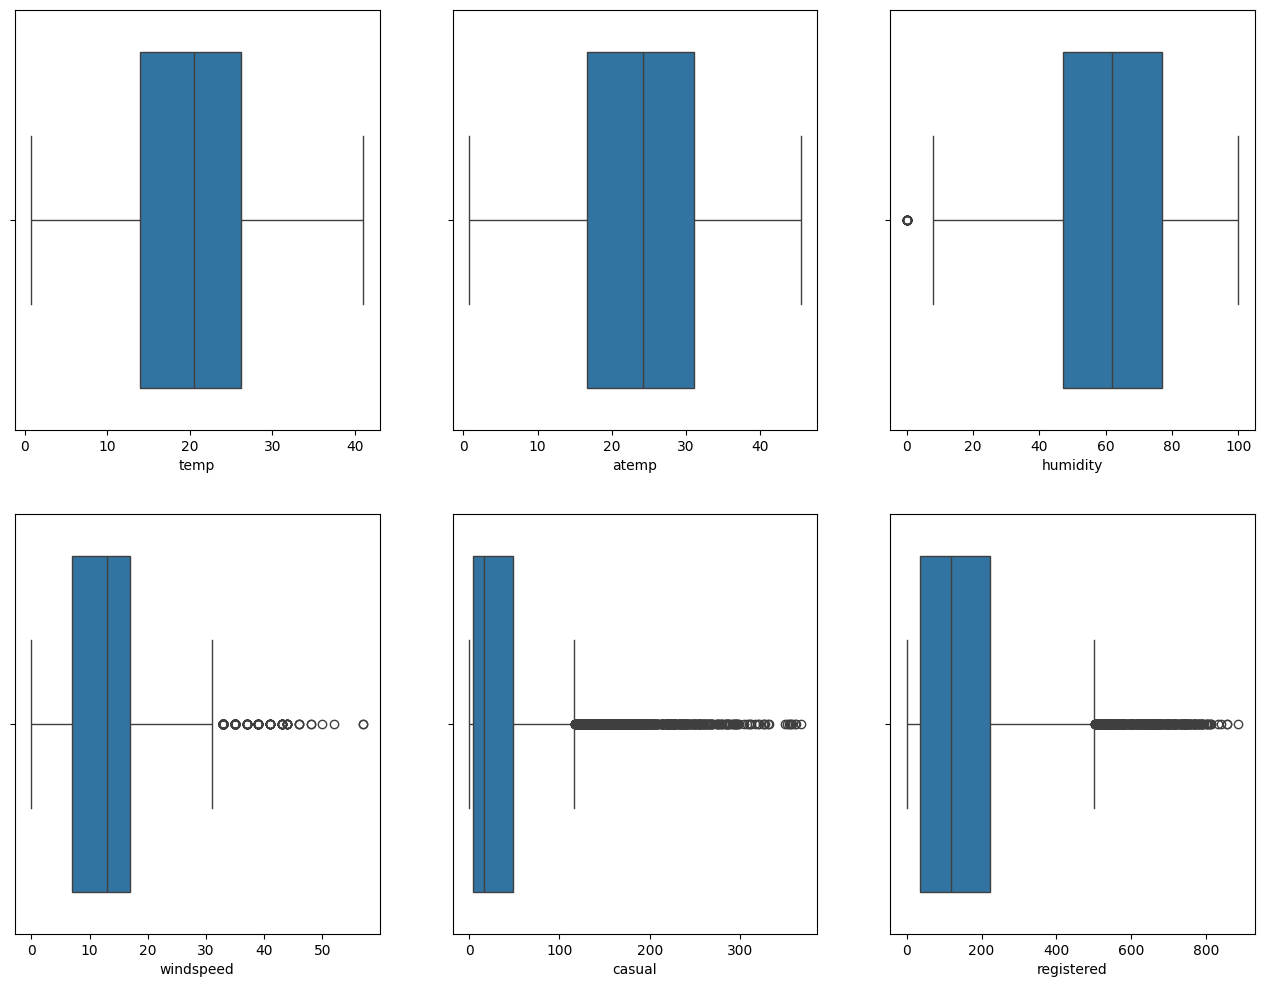

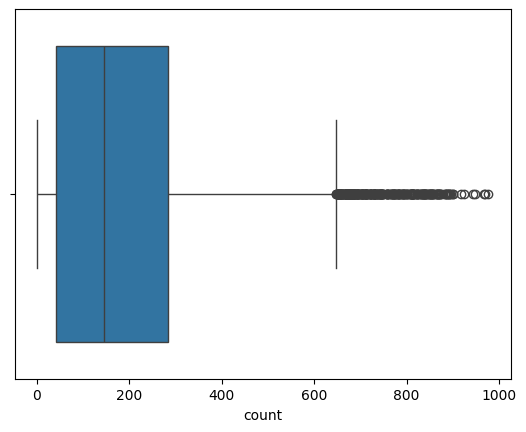

In [36]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=yl[num_cols[index]], ax=axis[row, col],)
        index += 1

plt.show()
sns.boxplot(x=yl[num_cols[-1]])
plt.show()

***Insight:***

There are potential outliers in the bike-related columns (casual, registered, count), as themaximum values significantly exceed the 75th percentiles. This could be due to special events, holidays, or unusual circumstances

# **Univariate Analysis:**


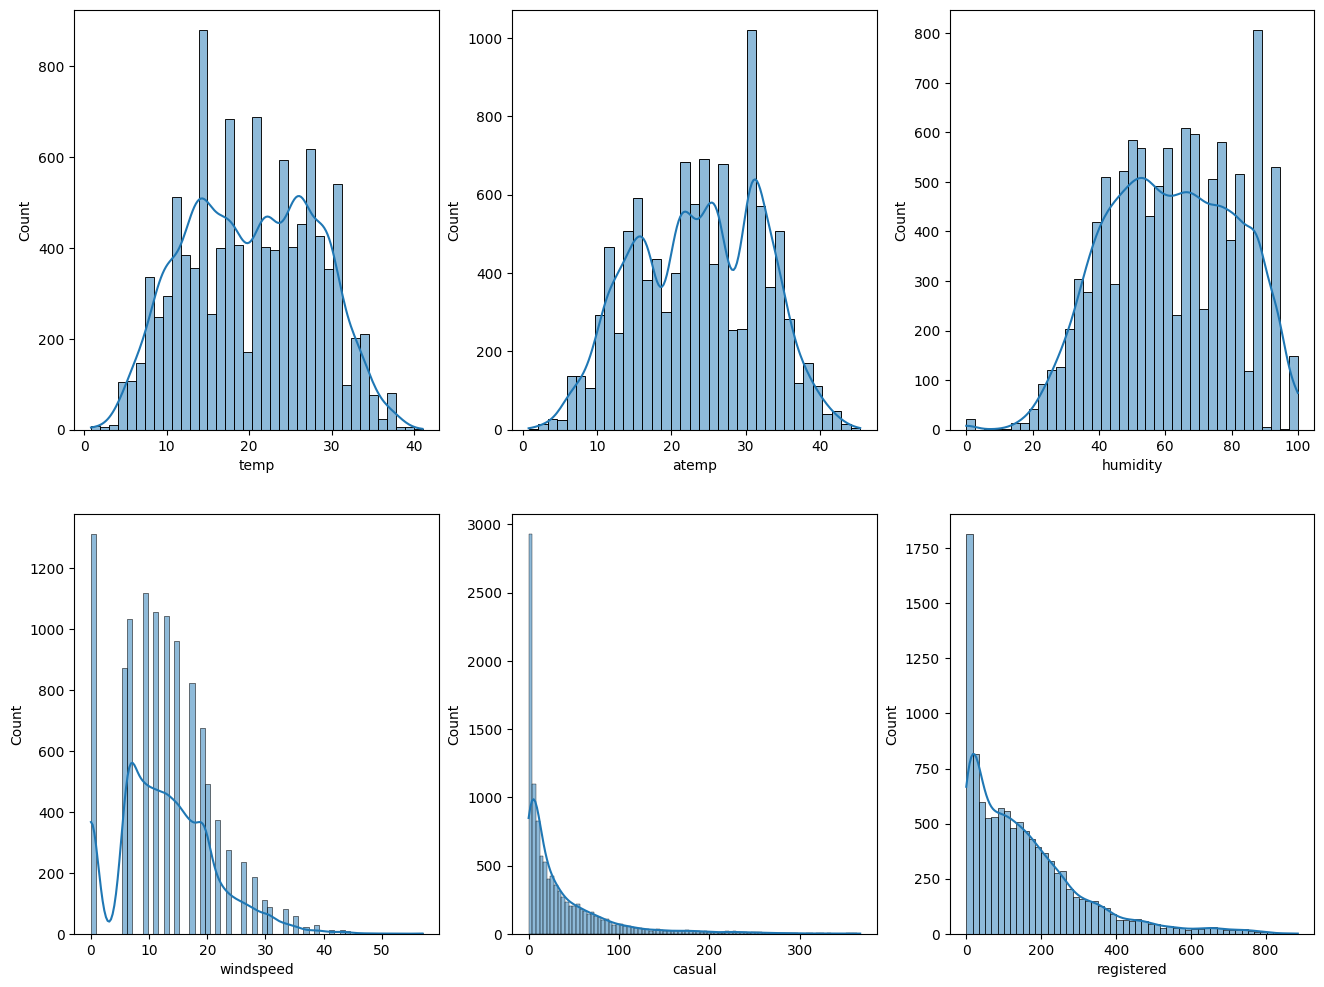

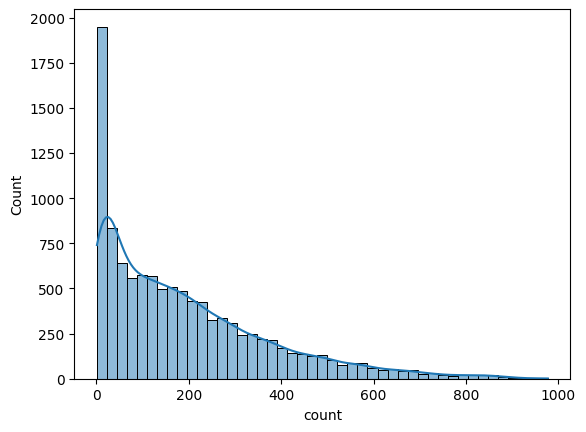

In [37]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(yulu[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(yulu[num_cols[-1]], kde=True)
plt.show()

***Insight:***

*  casual, registered and count somewhat looks like Log Normal
Distribution.

*  temp, atemp and humidity looks like they follows the Normal Distribution.

*  windspeed follows the binomial distribution.

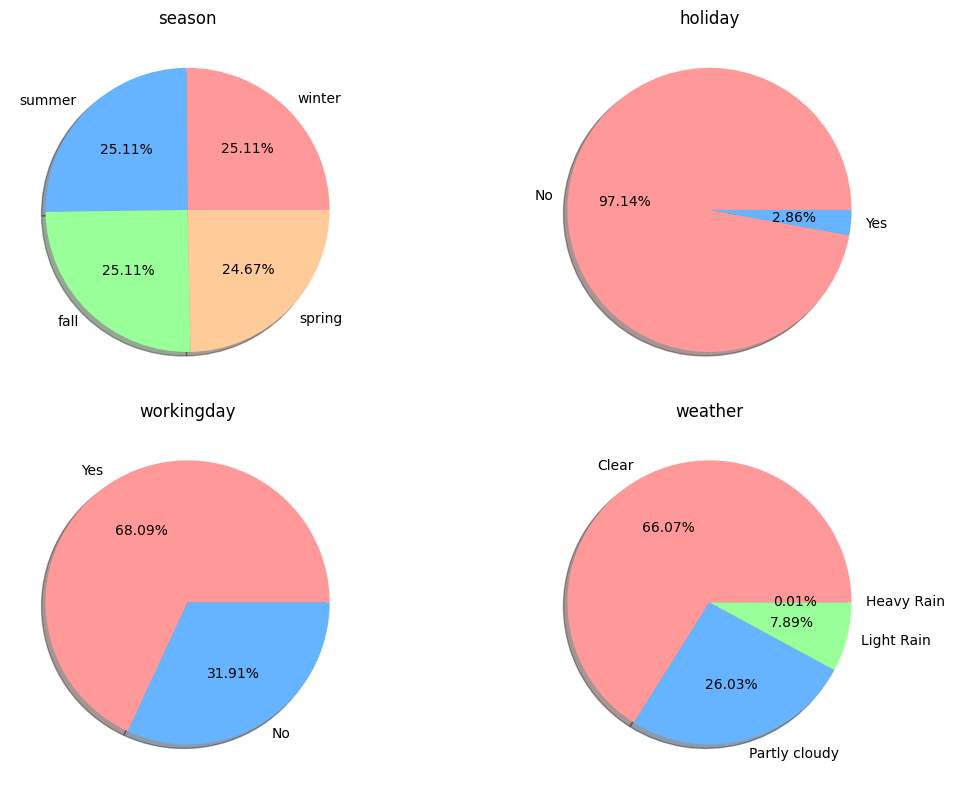

In [38]:
# Pie chart for Relative Percentage Distribution of Categorical Columns

# Create a 2x2 subplot grid
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# List of columns to plot
cols = ['season', 'holiday', 'workingday', 'weather']

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Iterate over the columns and plot the pie charts on corresponding subplots

for i, col in enumerate(cols):
    ax = axis[i // 2, i % 2]
    ax.pie(yl[col].value_counts(), labels=yl[col].value_counts().index, autopct='%1.2f%%',shadow=True,colors=colors)
    ax.set_title(col)

plt.tight_layout()
plt.show()

# **Bivariate Analysis:**

In [39]:
cols

['season', 'holiday', 'workingday', 'weather']

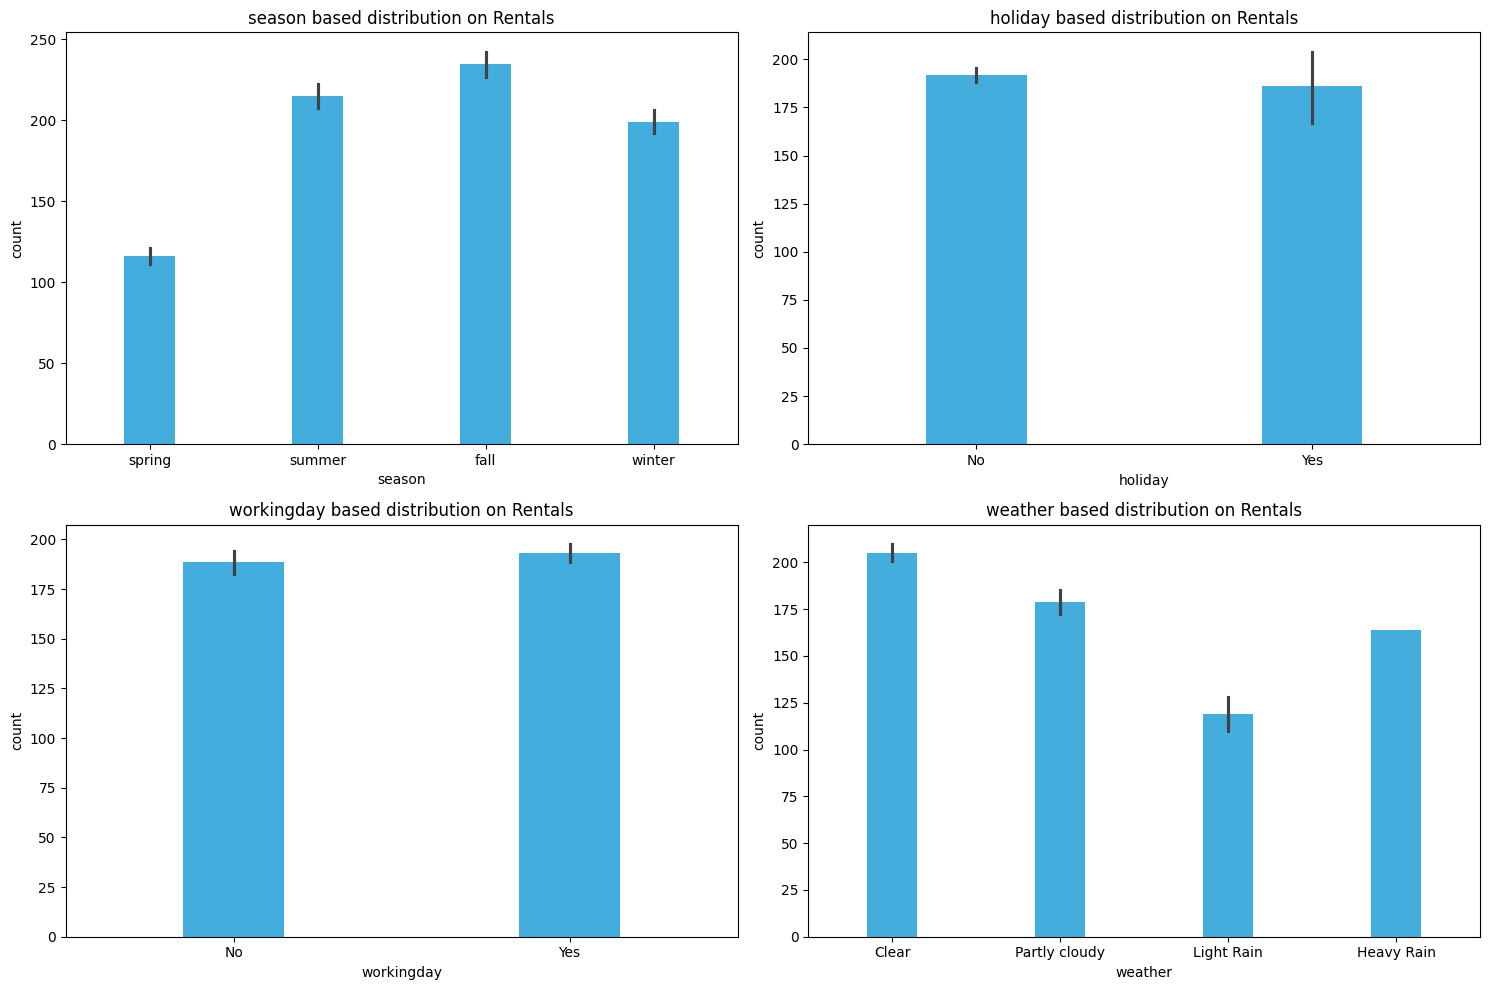

In [40]:
# Bar plot for Categories

plt.figure(figsize=(15, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=col, y='count', data=yl, color="#29B6F8", width=0.3)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title(f'{col} based distribution on Rentals')

plt.tight_layout()
plt.show()

In [41]:
# corrrelation analysis for Numerical columns

correlation_matrix = yl[["atemp", "temp", "humidity", "windspeed", "casual", "registered", "count"]].corr()
correlation_yl = pd.DataFrame(correlation_matrix)
correlation_yl

,atemp,temp,humidity,windspeed,casual,registered,count
atemp,1.000000,0.984948,-0.043536,-0.057473,0.462067,0.314635,0.389784
temp,0.984948,1.000000,-0.064949,-0.017852,0.467097,0.318571,0.394454
humidity,-0.043536,-0.064949,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.057473,-0.017852,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.462067,0.467097,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.314635,0.318571,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.389784,0.394454,-0.317371,0.101369,0.690414,0.970948,1.000000


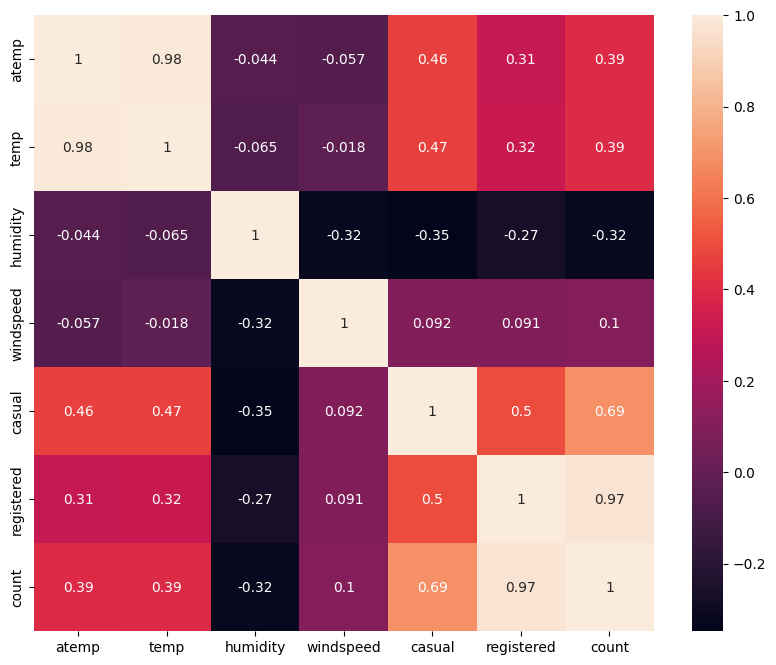

In [42]:
# Correlation Visualisation

plt.figure(figsize=(10,8))
sns.heatmap(correlation_yl, annot=True)
plt.show()

***Insights:***


1.  atemp is strongly correlated with temp(0.98) & moderate positive with count(0.39) suggesting a relationship with overall bike rentals.

2.  Temperature(temp) positively correlated with casual bikes rentals(0.48) second to atemp and moderate positive with count(0.39) suggesting a relation with overrall bike rentals

3.  Humididty have negative correlation with count(-0.32) , less humidity indicating higher number of bikes being rented.

4.  Windspeed has no much effect on rentals(0.1)

5.  Casual(Bikes) have strong positive correlation with 'atemp' (0.46) and 'temp' (0.47) and highly correlated with 'registered' (0.50) and 'count' (0.69), indicating a significant impact on overall rentals.

6.  Registered(Bikes) have positive correlation with atemp(0.31) and temp(0.32). Highly correlated with 'casual' (0.50) and 'count' (0.97), emphasizing a substantial impact on overall rentals.

7. Count(Total bikes) highly correlated with registered(0.97),showing how both casual and registered rentals together affect the total count.

# **Hypothesis Testing**

# **Q. Lets see whether data is Normaly distributed or not?**

**Null Hypothesis (H0)** -- Data is Normally Distributed.

**Alternative Hypothesis (Ha)** -- Data is not Normally Distributed.

**Shapiro-Wilk Test:**

                   Shapiro-Wilk test is widely used to check if a sample comes from a normally distributed population.

                 

In [43]:
np.random.seed(41)
yl_sample = yl.sample(100)["count"]
test_stat, p_val = shapiro(yl_sample)
p_val

2.6341210395843134e-07

**Assumation:** Let the Confidence interval be 95%, so siginificance (alpha) is 0.05

**Data is not Normally Distributed.**

*  P value is way lesser than significance (p_val < alpha). Rejecting the Null Hypothesis.

**Visual Representation:**

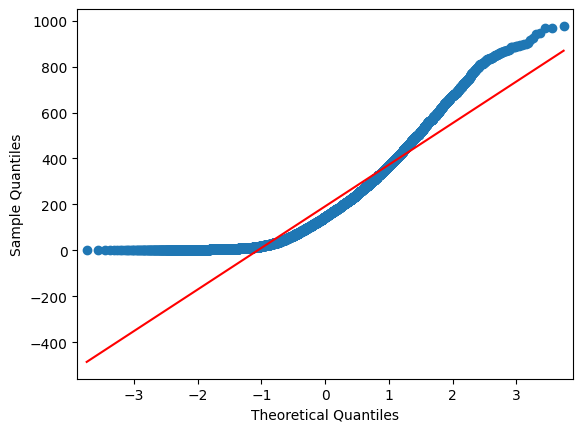

In [44]:
# Using QQ-plot to see the distribution of data

qqplot(yl['count'], line='s')
plt.show()

# **Q. Lets see whether demand of vehicles is same on Weekdays and Weekends(Holidays)**

We have workingday and holiday columns, both are independent , lets check Variance.

To check Variance between two independent columns using Levene's Test

# **Levene Test:**

**Null Hypothesis (H0)**        -- Variance between groups are equal.

**Alternatove Hypothesis (Ha)**-- Variance between groups are different.

Assuming Confidence interval of 95% , Siginficance(alpha - 0.05)

In [45]:
working_day =  yl[yl['workingday'] == 'Yes']['count']
holiday =  yl[yl['workingday'] == 'No']['count']

levene_stat ,p_val = levene(working_day,holiday)
p_val

0.9437823280916695

<Axes: xlabel='count', ylabel='Density'>

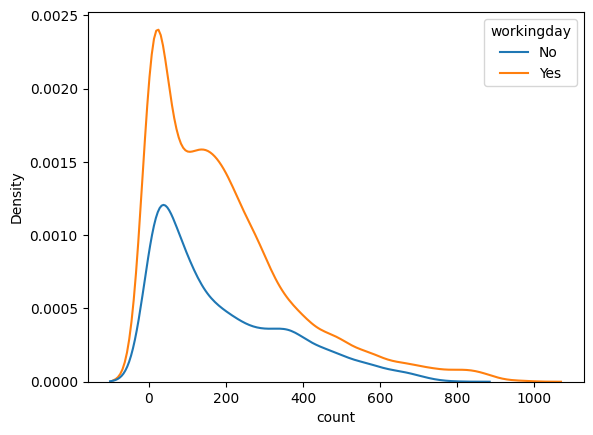

In [46]:
# Lets Visualise the Variance

sns.kdeplot( data= yl, x='count' , hue='workingday')

**Variances are approximately Equal.**


Despite the data is not normally distributed according to both the Wilkin-ShapiroTest and qq-plot

It is important to highlight that the variances between the two groups are equal


# **Two Sample Independent T-Test.**


1. As size is large enough we are performing this test eventhough data is not Normally Distributed.
2.  Variance is approximatly equal.
3.  Depedent Variable(count) is continuous.


**Null Hypothesis (H0)** : There is no significant difference between working and non-working days.


**Alternative Hypothesis (Ha)**: There is a significant difference between working and non-working days.

In [47]:
ttest_stat, p_val = ttest_ind(working_day, holiday)

p_val

0.22644804226361348

# **Kruskal-Wallis test**

In [48]:
kruskal_stat, p_val = kruskal(working_day, holiday)

p_val

0.9679113872727798

P_value is greater than significance level in both Kruskal and T-test , so Failed to reject the Null Hypothesis.

Therefore, **There is no significant difference on bike rentals between working and non-working days.**

# **Q. Lets see whether Bike rentals demand is same for all Weather Conditions**

Now we have one Categorical Column (weather) and one Continuous column (Count)

lets have assumptions:

**Null Hypothesis (H0):** There is no significant difference between demand of bikes for different Weather conditions.


**Alternative Hypothesis (Ha) :** There is a significant difference between demand of bikes for different Weather conditions.


Weather column has 4 different groups , to test the this variable significant in predicting the demand for shared electric cycles, we can use  both Krushkal and One-way ANOVA tests based on Assumption satisfaction.

# **ANOVA TEST on Weather Conditions:**

Assumptions

1.  Data should be Normally Dsitribited - This condition not met as verified by QQ plot and Shapiro Test.

2.  Data points in categorical column should be Independent - This condtion Satisfied.

3.  Equal variance within groups- This has to be check again using Levene's Test.


In [49]:
yl['weather'].unique()

array(['Clear', 'Partly cloudy', 'Light Rain', 'Heavy Rain'], dtype=object)

<Axes: xlabel='count', ylabel='Density'>

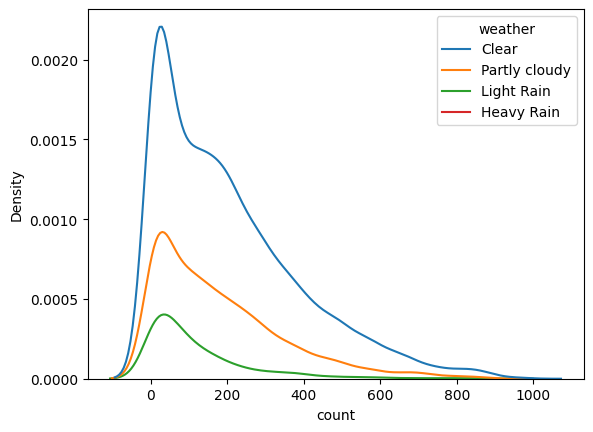

In [50]:
# Lets Visualise Weather conditions data
sns.kdeplot(data = yl, x = 'count', hue = 'weather')

***Insight:***

*  Postively Skewed Data for every group in weather.

In [51]:
#The Test hypothesis for Levene's test are:

# H0: The variances are equal.
# Ha: The variances are not equal

clear_weather  = yl[yl['weather'] == 'Clear']['count']
partly_cloudly = yl[yl['weather'] == 'Partly cloudy']['count']
light_rain     = yl[yl['weather'] == 'Light Rain']['count']
heavy_rain     = yl[yl['weather'] == 'Heavy Rain']['count']

levene_stat, p_val = levene(clear_weather, partly_cloudly, light_rain, heavy_rain)
print(p_val)

if p_val > 0.05:
  print("The variances are equal.")
else:
  print("The variances are not equal.")

3.504937946833238e-35
The variances are not equal.


P Value is smaller than significance level, Null hypothesis is reject -**variances are not equal**

Out 3 assumpations, 2 assumptions are not satifisied. Its better considering Kruskal Test but lets see how ANOVA test reacts on this data.

In [52]:
anova_stat, p_val = f_oneway(clear_weather, partly_cloudly, light_rain, heavy_rain)

print(p_val)

if p_val > 0.05:
  print("There is no significant difference between demand of bikes for different Weather conditions.")
else:
  print("There is a significant difference between demand of bikes for different Weather conditions.")

5.482069475935669e-42
There is a significant difference between demand of bikes for different Weather conditions.


# **Kruskal Test on Weather Condition:**

In [53]:
kruskal_stat, p_val = kruskal(clear_weather, partly_cloudly, light_rain, heavy_rain)

print(p_val)

if p_val > 0.05:
  print("There is no significant difference between demand of bikes for different Weather conditions.")
else:
  print("There is a significant difference between demand of bikes for different Weather conditions.")


3.501611300708679e-44
There is a significant difference between demand of bikes for different Weather conditions.


***Insights:***


*   P value in both test less than significance level with this we can conclude that there is a **significant difference between demand of bikes for different Weather conditions.**


# **Q. Lets see whether Bike rentals demand is same for all Seasons**

Now we have one Categorical Column (Season) and one Continuous column (Count)

lets have assumptions:

**Null Hypothesis (H0):** There is no significant difference between demand of bikes for different seasons.


**Alternative Hypothesis (Ha) :** There is a significant difference between demand of bikes for different seasons .


Season column also has 4 different groups , to test the this variable significant in predicting the demand for shared electric cycles, we can use  both Krushkal and One-way ANOVA tests based on Assumption satisfaction.

# **ANOVA TEST on Season:**

Assumptions

1.  Data should be Normally Dsitribited - This condition not met as verified by QQ plot and Shapiro Test.

2.  Data points in categorical column should be Independent - This condtion Satisfied.

3.  Equal variance within groups- This has to be check again using Levene's Test.


In [54]:
yl['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

<Axes: xlabel='count', ylabel='Density'>

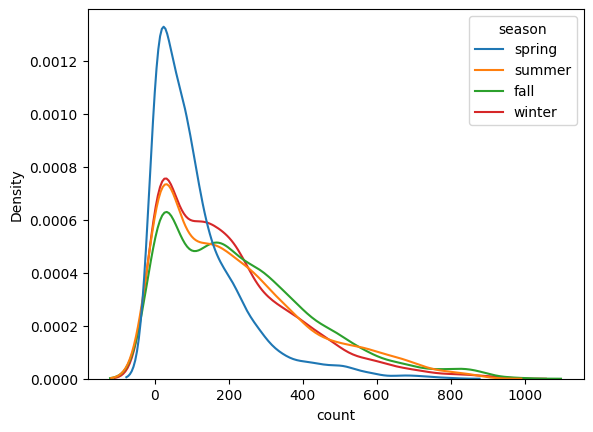

In [55]:
# Lets visualise Season data

sns.kdeplot(data = yl, x = 'count', hue = 'season')

In [56]:
yl.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [57]:
yl.groupby('season')['count'].skew()

,count
season,
fall,0.991495
spring,1.888056
summer,1.003264
winter,1.172117


***Insight:***

*  Data is more Positive Skewed.Distribution has a longer and fatter tail on the right side.

In [58]:
#The Test hypothesis for Levene's test are:

# H0: The variances are equal.
# Ha: The variances are not equal

spring  = yl[yl['season'] == 'spring']['count']
summer = yl[yl['season'] == 'summer']['count']
fall     = yl[yl['season'] == 'fall']['count']
winter     = yl[yl['season'] == 'winter']['count']

levene_stat, p_val = levene(spring, summer, fall, winter)
print(p_val)
if p_val > 0.05:
  print("The variances are equal.")
else:
  print("The variances are not equal.")

1.0147116860043298e-118
The variances are not equal.


P Value is smaller than significance level, Null hypothesis is rejected - **variances are not equal**

Out 3 assumpations, 2 assumptions are not satifisied. Its better considering Kruskal Test but lets see how ANOVA test reacts on this data also.

In [59]:
anova_stat, p_val = f_oneway(spring, summer, fall, winter)

print(p_val)

if p_val > 0.05:
  print("There is no significant difference between demand of bikes for different Seasons.")
else:
  print("There is a significant difference between demand of bikes for different Seasons.")

6.164843386499654e-149
There is a significant difference between demand of bikes for different Seasons.


# **Kruskal Test on Season**

In [60]:
kruskal_stat , p_val = kruskal(spring, summer, fall, winter)

print(p_val)

if p_val > 0.05:
  print("There is no significant difference between demand of bikes for different Seasons.")
else:
  print("There is a significant difference between demand of bikes for different Seasons.")

2.479008372608633e-151
There is a significant difference between demand of bikes for different Seasons.


***Insights:***

*  **we can conclude that there is a significant difference between demand of bicycles for different Seasons**.

# **Q. Lets see Weather Conditions Across Seasons using Chi-square Test**


The hypothesis for the chi-square test are:

**Null Hypothesis (H0)**: Season and Weather are independent of each other.

**Alternative Hypothesis (Ha)**: Season and Weather are dependent on each other.

In [61]:
table = pd.crosstab(yl['season'],yl['weather'])
table

weather,Clear,Heavy Rain,Light Rain,Partly cloudy
season,,,,
fall,1930,0,199,604
spring,1759,1,211,715
summer,1801,0,224,708
winter,1702,0,225,807


In [63]:
chi2_contingency(table)


Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[1.80559765e+03, 2.51056403e-01, 2.15657450e+02, 7.11493845e+02],
       [1.77454639e+03, 2.46738931e-01, 2.11948742e+02, 6.99258130e+02],
       [1.80559765e+03, 2.51056403e-01, 2.15657450e+02, 7.11493845e+02],
       [1.80625831e+03, 2.51148264e-01, 2.15736359e+02, 7.11754180e+02]]))

***Insight:***

**P value is way less then Alpha (0.05) , we can conclude that Season and Weather are dependent on each other.**

# **Business Recommedations:**

* Implement dynamic pricing, where the rental price varies based on factors like demand, time of day, season, or special events in the area. For example, pricing can be higher during peak tourist seasons

*  Bike rentals are occuring more during summer ,while the minimum in winter, by these seasonal patterns ,its better to keep more bikes in stock during summer and less in winter and better to introduce incentives and packages benefiting both customer and corporate to drive higher demand.

*  Season and weather are correlated,in rainy day rentals are sharply decreased,by safety measures like providing rain jackets and amenities like water-resistent bags. This elevates overall biking experience and comfort and also contributes to positive customer feedback.

*  Less rentals on holidays and weekends but overall count on working and non holiday are similar. Introduce special packages or discounts on weekends or non holiday days to attract more users.

*  Utilizing social media platforms beneficts, sharing biking experience or customer testimonials and running targeted advertising campaigns will help build brand reputation.

*  Bring variety of bikes or models like mountain bikes, road bikes, electric bikes, tandem bikes, and children's bikes. This allows you to appeal to a wider range of customers.

*  Rent out accessories like helmets, locks, baskets, and even phone holders for additional revenue.

*  Collbarate with local hotels, resorts, or travel agencies to offer discounted bike rentals for their guests. Offer convenient delivery and pick-up services for customers staying at these locations.